In [5]:
from search import *
from collections import deque
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
import heapq
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time
import queue


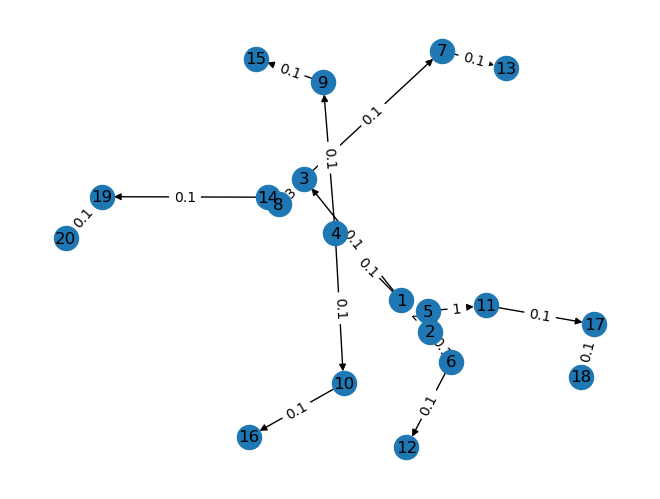

In [6]:


# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from([i+1 for i in range(20)])

# Add edges to the graph with weights
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=.1)
G.add_edge(1, 4, weight=0.1)
G.add_edge(2, 5, weight=1)
G.add_edge(2, 6, weight=0.1)
G.add_edge(3, 7, weight=.1)
G.add_edge(3, 8, weight=3)
G.add_edge(4, 9, weight=0.1)
G.add_edge(4, 10, weight=0.1)
G.add_edge(5, 11, weight=1)
G.add_edge(6, 12, weight=0.1)
G.add_edge(7, 13, weight=.1)
G.add_edge(8, 14, weight=4)
G.add_edge(9, 15, weight=0.1)
G.add_edge(10, 16, weight=0.1)
G.add_edge(11, 17, weight=0.1)
G.add_edge(17, 18, weight=0.1)
G.add_edge(14, 19, weight=0.1)
G.add_edge(19, 20, weight=0.1)



# Define the start and goal nodes
#start = 1
#goal = 5

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Draw the edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [7]:
edge_weights = nx.get_edge_attributes(G, 'weight')
edgeWeightsTrue = []

for edge, weight in edge_weights.items():
    G[edge[0]][edge[1]]['weight'] = (-1*weight)+5.3
    #edgeWeightsTrue.append(weight)

    

{(1, 2): 3.3, (1, 3): 5.2, (1, 4): 5.2, (2, 5): 4.3, (2, 6): 5.2, (3, 7): 5.2, (3, 8): 2.3, (4, 9): 5.2, (4, 10): 5.2, (5, 11): 4.3, (6, 12): 5.2, (7, 13): 5.2, (8, 14): 1.2999999999999998, (9, 15): 5.2, (10, 16): 5.2, (11, 17): 5.2, (14, 19): 5.2, (17, 18): 5.2, (19, 20): 5.2}


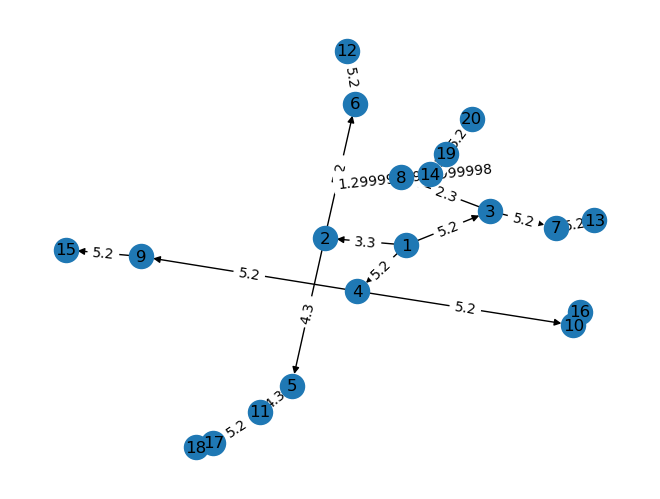

In [8]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)


# Draw the edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
print(labels)

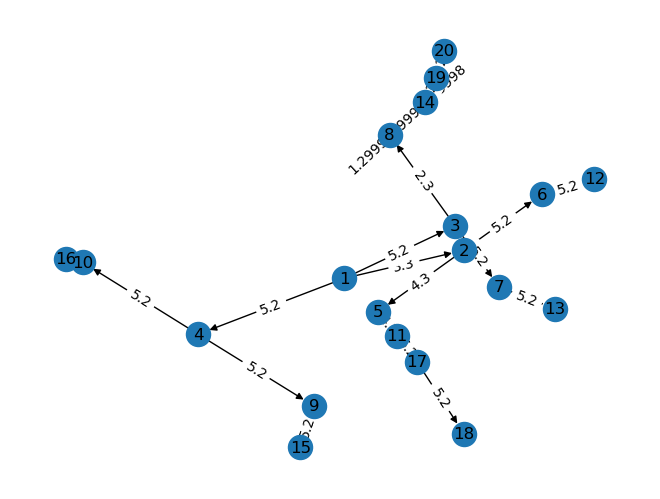

In [48]:
plt.show()

In [68]:

#https://docs.python.org/3/library/queue.html Same thing as what we used in class, just in its own library so we dont need another file

def uniform_cost_search(G, start, x ):
    frontier = queue.PriorityQueue() # create a priority queue for storing nodes and their costs
    frontier.put((0, start, [])) # put the starting node in the queue with a cost of 0 and an empty path(equal to append in the class code)
    explored = set() # create a set for storing explored nodes
   
    while frontier:
        cost, node, path = frontier.get() # get the next node with the lowest cost from the queue(Same as pop())
        print("node: ", node, "  edge weight: ", cost, " path: ", path)
        
        pathlength = len(path) + 1 #We are looking for the length of the path, including what the next node would add
        count = 0
        #print("next weight in frontier:", new_min_cost)
        
        if(frontier.queue != []):
            new_min_cost, next_node, next_path = frontier.queue[0]
            print("next nodes: ", new_min_cost, next_node, next_path)
        else:
            new_min_cost = 5
            
        if (cost - pathlength/x) < (new_min_cost-(pathlength+1)/x): #path is longer in next code
            #print("next weight in frontier:", new_min_cost)
            print("cost at term step: ", cost, "next cost: ", new_min_cost, "pathlength: ", pathlength)
            return path   # solution path
        
        print("cost: ", cost, " new_min_cost: ", new_min_cost)
        if node not in explored:
            explored.add(node) # add it to the explored set
            #print(explored)
            neighbors = G.neighbors(node) # get the neighbors of the node
            for neighbor in neighbors:
                weight = G.get_edge_data(node, neighbor)['weight'] # get the weight of the edge
                if neighbor not in explored:
                    
                    new_cost = cost + weight - (pathlength+1)/x + (pathlength)/x  # calculate the new cost
                    new_path = path + [node] # extend the path
                    frontier.put((new_cost, neighbor, new_path)) # add the neighbor and its cost to the frontier

    return None 

In [69]:
path = uniform_cost_search(G, 1, .1)

node:  1   edge weight:  0  path:  []
cost:  0  new_min_cost:  5
node:  2   edge weight:  -6.699999999999999  path:  [1]
next nodes:  -4.800000000000001 3 [1]
cost:  -6.699999999999999  new_min_cost:  -4.800000000000001
node:  5   edge weight:  -12.399999999999999  path:  [1, 2]
next nodes:  -11.5 6 [1, 2]
cost:  -12.399999999999999  new_min_cost:  -11.5
node:  11   edge weight:  -18.099999999999994  path:  [1, 2, 5]
next nodes:  -11.5 6 [1, 2]
cost:  -18.099999999999994  new_min_cost:  -11.5
node:  17   edge weight:  -22.89999999999999  path:  [1, 2, 5, 11]
next nodes:  -11.5 6 [1, 2]
cost at term step:  -22.89999999999999 next cost:  -11.5 pathlength:  5


In [70]:
print(path)

[1, 2, 5, 11]


In [ ]:

#https://docs.python.org/3/library/queue.html Same thing as what we used in class, just in its own library so we dont need another file
# Temp Code, not being used right now
def uniform_cost_search(G, start, x ):
    frontier = queue.PriorityQueue() # create a priority queue for storing nodes and their costs
    frontier.put((0, start, [])) # put the starting node in the queue with a cost of 0 and an empty path(equal to append in the class code)
    explored = set() # create a set for storing explored nodes
    min_weight = 1000
    while frontier:
        cost, node, path = frontier.get() # get the next node with the lowest cost from the queue(Same as pop())
        
        print("node: ", node, "  edge weight: ", cost, " path: ", path)
        print("min weight: ", min_weight)
        pathlength = len(path) + 1 #We are looking for the length of the path, including what the next node would add
        count = 0
        #print("next weight in frontier:", new_min_cost)
        if(frontier.queue != []):
            new_min_cost, next_node, next_path = frontier.queue[0]
            print("next nodes: ", new_min_cost, next_node, next_path)
        else:
            new_min_cost = 5
            
        if cost > min_weight * 3: 
            #path is longer in next code
            #print("next weight in frontier:", new_min_cost)
            return path + [node] # solution path
        min_weight = min(min_weight, cost)
        if node not in explored:
            explored.add(node) # add it to the explored set
            
            #print(explored)
            neighbors = G.neighbors(node) # get the neighbors of the node
            for neighbor in neighbors:
                weight = G.get_edge_data(node, neighbor)['weight'] # get the weight of the edge
                if neighbor not in explored:
                    #weight = 
                    new_cost = cost + weight  # calculate the new cost
                    new_path = path + [node] # extend the path
                    frontier.put((new_cost, neighbor, new_path)) # add the neighbor and its cost to the frontier

    return None 

In [3]:
from itertools import chain

# declare node where search will start
center_node = 35
ego_length = 1

# extract each subgraph layer using ego_graph()
# Needs to be in layers for visualization purposes
subgraph1 = nx.ego_graph(G, center_node, radius=ego_length, center=True, undirected=False)
subgraph2 = nx.ego_graph(G, center_node, radius=ego_length+1, center=True, undirected=False)
subgraph3 = nx.ego_graph(G, center_node, radius=ego_length+2, center=True, undirected=False)
subgraph4 = nx.ego_graph(G, center_node, radius=ego_length+3, center=True, undirected=False)
subgraph5 = nx.ego_graph(G, center_node, radius=ego_length+4, center=True, undirected=False)
subgraph_list = [subgraph1, subgraph2, subgraph3, subgraph4]

# Clean each layer so there are no duplicates
layers = [[35]]
explored_list = [35]
for sub in subgraph_list:
    layers.append([x for x in sub.nodes() if x not in explored_list])
    explored_list = list(chain([x for x in sub.nodes()], explored_list))

#print(layers)

# Loop through list of node layers, declaring which subset belongs to which layer
subgraph = nx.DiGraph()
for i in range(len(layers)):
    subgraph.add_nodes_from(layers[i], layer=i, subset_key=('L'+str(i)))

# Loop through edge weights to add to visualization
for row in weighted_edges.iterrows():
    if int(row[1][0]) in subgraph.nodes():
        if int(row[1][1].item()) in subgraph.nodes():
            subgraph.add_edge(int(row[1][0]), int(row[1][1]), weight=int(row[1][2]))

# instantiate visualization (Conway taught me that word lol)
pos = nx.multipartite_layout(subgraph, subset_key='subset_key')
nx.draw(subgraph, pos, with_labels=True, node_size=20, font_size=4, width=0.1)

# Draw edge labels
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=4)

plt.show()

NameError: name 'G' is not defined